<a href="https://colab.research.google.com/github/gyumin125/25-2-DIP-202302456/blob/main/HW03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 1

- 본인이 직접 촬영한 같은 배경으로 변화를 관찰한 사진 두 장을 불러오고, affine transform을 활용한 registration을 통해 배경의 위치를 맞춘 후 subtraction을 진행하자.

어긋난 scene을 포함하는 2장의 사진을 직접 찍은 후, registration과정진행해서 최대한 유사하게 만들고 뺴기 진행.(ex. 낮과밤/ 사람 많고 적을 떄 /책장 책의 수의 차이 등)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd

In [2]:
from google.colab import drive
import os
img01='hufsdorm1.jpg'
img02='hufsdorm2.jpg'

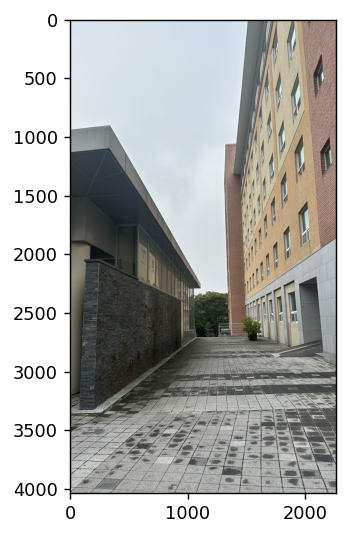

In [3]:
img01_data = plt.imread(img01)

plt.figure(dpi=128)
plt.imshow(img01_data)
plt.show()

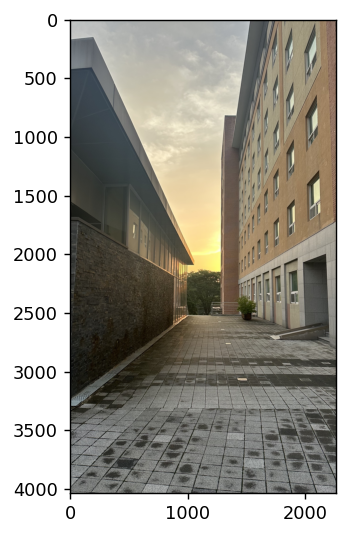

In [4]:
img02_data = plt.imread(img02)

plt.figure(dpi=128)
plt.imshow(img02_data)
plt.show()

In [5]:
img01_data= img01_data.astype(np.int16)
img02_data = img02_data.astype(np.int16)

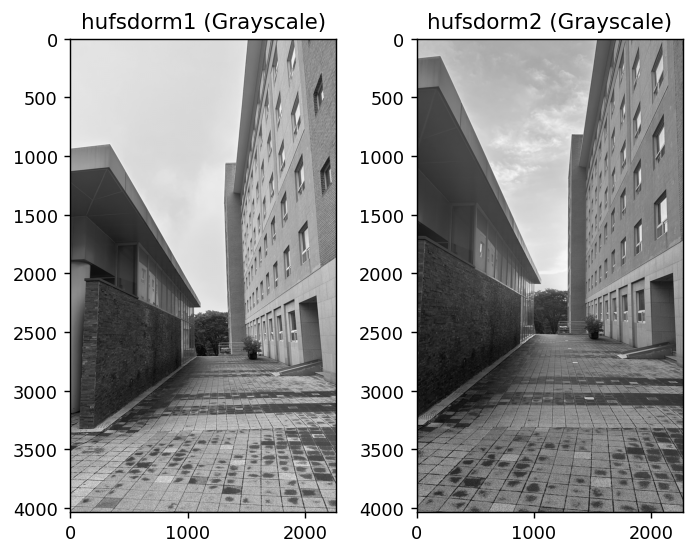

In [6]:
# Convert img01_data to grayscale
img01_gray = np.dot(img01_data[...,:3], [0.2989, 0.5870, 0.1140])

# Convert img02_data to grayscale
img02_gray = np.dot(img02_data[...,:3], [0.2989, 0.5870, 0.1140])

# Display the grayscale images to verify
plt.figure(dpi=128)
plt.subplot(121)
plt.imshow(img01_gray, cmap='gray')
plt.title('hufsdorm1 (Grayscale)')

plt.subplot(122)
plt.imshow(img02_gray, cmap='gray')
plt.title('hufsdorm2 (Grayscale)')
plt.show()

## Translation

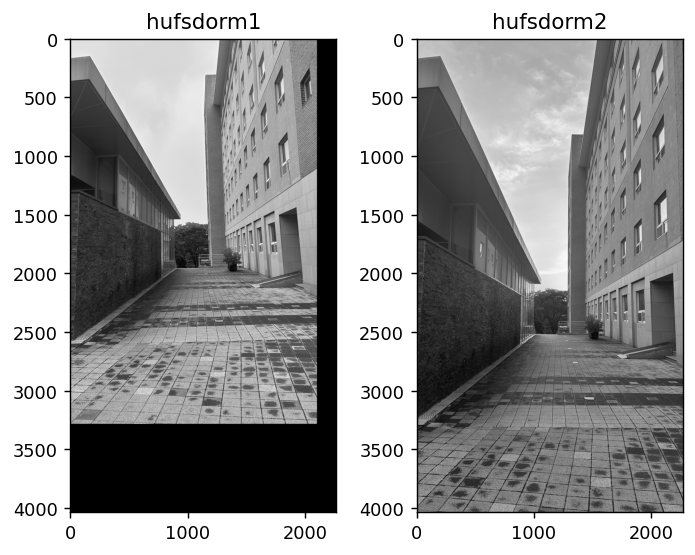

In [7]:
tx = 750
ty = 170
T =np.array([
    [1,0,tx],
    [0,1,ty],
    [0,0,1]])

img01_moved = nd.affine_transform(img01_gray,T)

plt.figure(dpi=128)
plt.subplot(121)
plt.imshow(img01_moved, cmap='gray')
plt.title('hufsdorm1')

plt.subplot(122)
plt.imshow(img02_gray, cmap='gray')
plt.title('hufsdorm2')
plt.show()

## Scaling

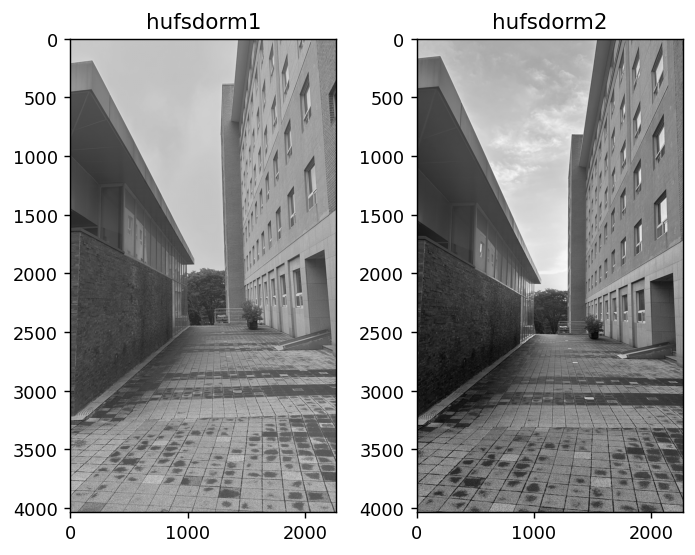

In [8]:
sx = 0.80
sy = 0.89
S =np.array([
    [sx,0,0],
    [0,sy,0],
    [0,0,1]])

img01_moved_s = nd.affine_transform(img01_moved,S)

plt.figure(dpi=128)
plt.subplot(121)
plt.imshow(img01_moved_s, cmap='gray')
plt.title('hufsdorm1')

plt.subplot(122)
plt.imshow(img02_gray, cmap='gray')
plt.title('hufsdorm2')
plt.show()

## Rotation

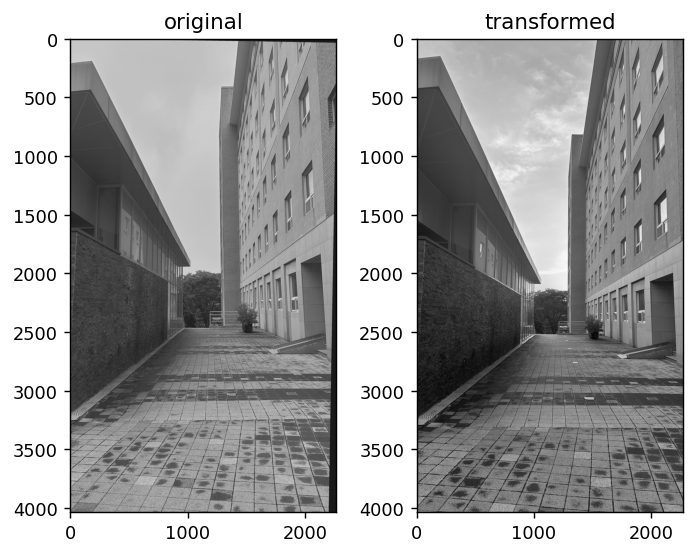

In [9]:
theta = 1*np.pi/180
R =np.array([
    [np.cos(theta),-np.sin(theta),0],
    [np.sin(theta),np.cos(theta),0],
    [0,0,1]])
img01_moved_r = nd.affine_transform(img01_moved_s,R)

plt.figure(dpi=128)
plt.subplot(121)
plt.imshow(img01_moved_r, cmap='gray')
plt.title('original')

plt.subplot(122)
plt.imshow(img02_gray, cmap='gray')
plt.title('transformed')
plt.show()

## Shearing

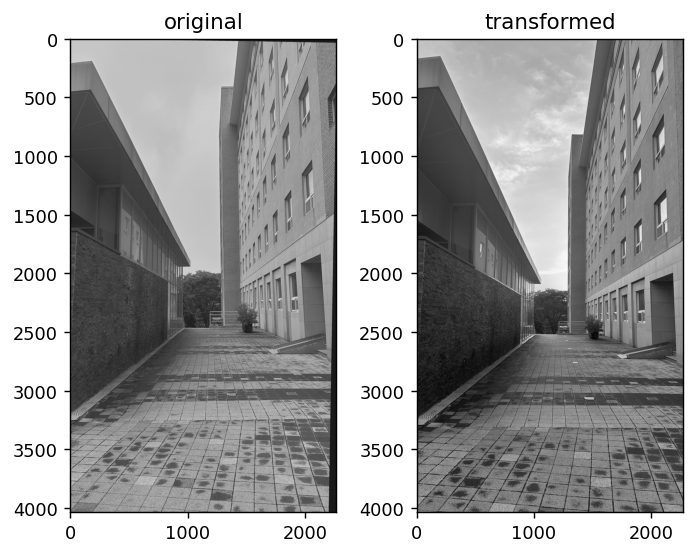

In [10]:
hx = 0
hy = 0
H =np.array([
    [1,hx,0],
    [hy,1,0],
    [0,0,1]])

img01_moved_sh = nd.affine_transform(img01_moved_r,H)

plt.figure(dpi=128)
plt.subplot(121)
plt.imshow(img01_moved_sh, cmap='gray')
plt.title('original')

plt.subplot(122)
plt.imshow(img02_gray, cmap='gray')
plt.title('transformed')
plt.show()

## Registration

ty= 0


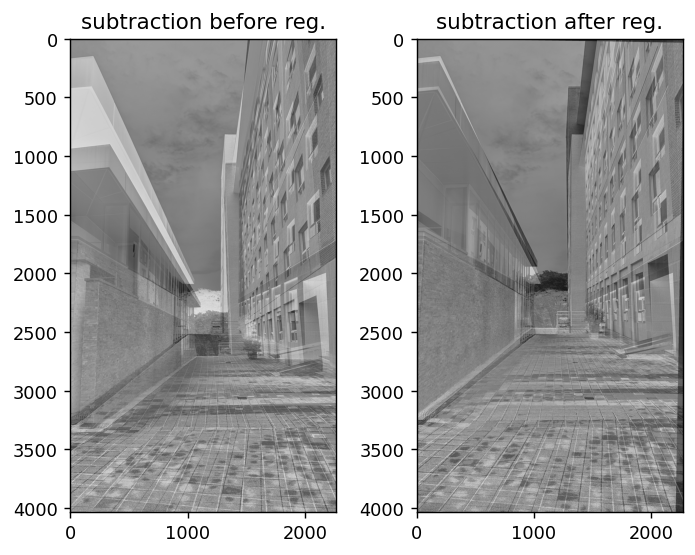

ty= 2


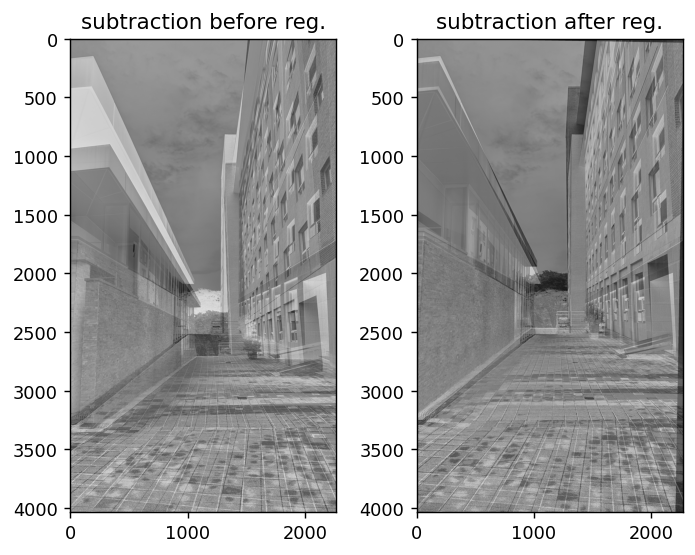

ty= 4


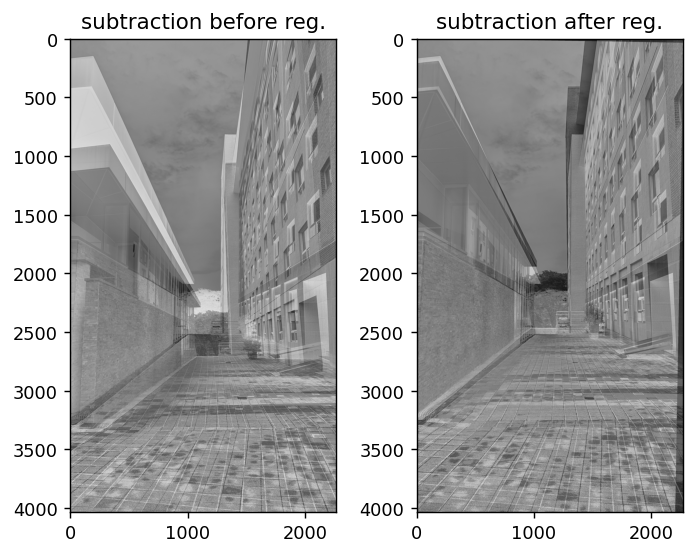

ty= 6


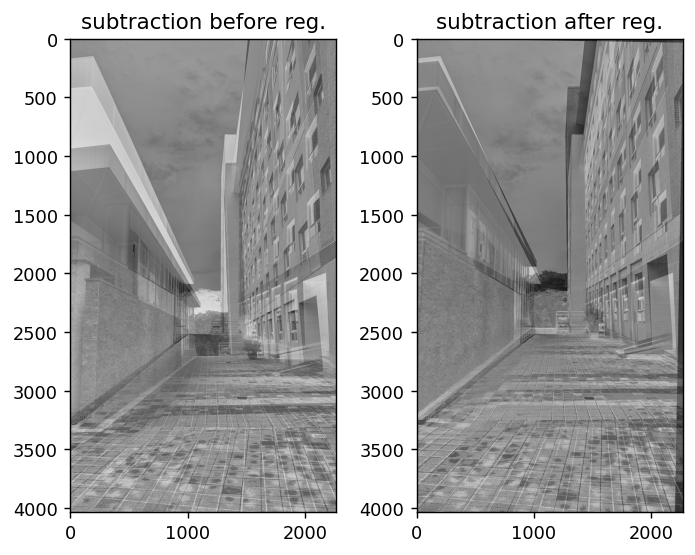

ty= 8


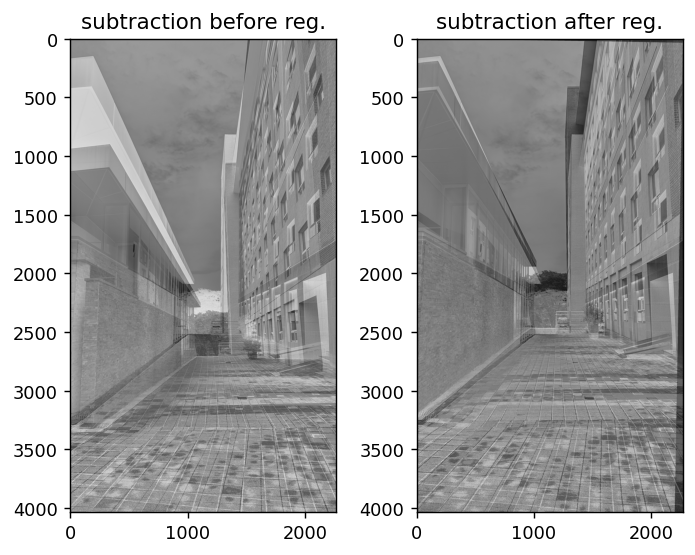

ty= 10


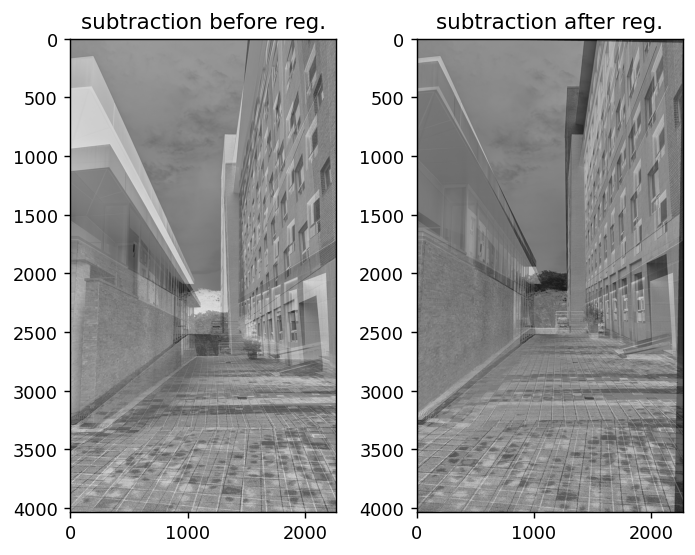

In [11]:
tx = 0
for ty in np.arange(0,12,2):
  T =np.array([
      [1,0,tx],
      [0,1,ty],
      [0,0,1]])

  img01reg_moved = nd.affine_transform(img01_moved_sh,T)

  print("ty=",ty)
  plt.figure(dpi=128)
  plt.subplot(121)
  plt.imshow(img01_gray-img02_gray, cmap='gray')
  plt.title('subtraction before reg.')

  plt.subplot(122)
  plt.imshow(img01reg_moved-img02_gray, cmap='gray')
  plt.title('subtraction after reg.')
  plt.show()

## Exercise 2
- registration을 진행한 longitudinal medical image data를 불러오고, subtration image를 생성해보자.
- registration의 결과를 평가하고, subtraction image를 통한 분석을 통해 추가적으로 필요한 부분이 있을 지 고민하여 보자.

CT영상 registration한 결과를 새로운 nil.gz파일로 저장하고, 불러와서, 관심 slice에 대해 빼기 진행하고 더 필요한 과정이 무엇인지 확인해보기.

In [12]:
import nibabel as nib

In [13]:
day00 = nib.load('day00.nii.gz').get_fdata()
day025 = nib.load('day025_reg.nii.gz').get_fdata()
print(day00.shape,day025.shape)

(512, 512, 70) (512, 512, 70)


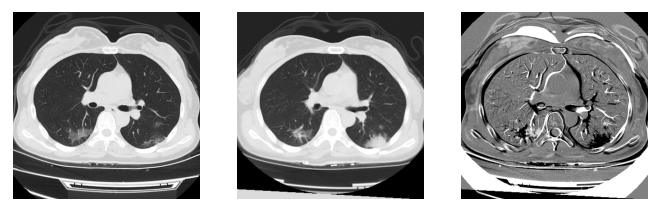

In [14]:
z = 40
plt.figure(dpi=128)
plt.subplot(131)
plt.imshow(day00[50:-50,50:-50,z].transpose(),cmap='gray',vmin=-1200,vmax=200)
plt.axis('off')
plt.subplot(132)
plt.imshow(day025[50:-50,50:-50,z].transpose(),cmap='gray',vmin=-1200,vmax=200)
plt.axis('off')
plt.subplot(133)
plt.imshow(day00[50:-50,50:-50,z].transpose()-day025[50:-50,50:-50,z].transpose(),cmap='gray',vmin=-350,vmax=350)
plt.axis('off')
plt.show()

Registration 결과, 폐의 염증이나 다른 문제로 인한 차이가 어둡게 보이는 등 차이 확인에 있어서 용이했다. 그러나 폐의 주변 경계부는 약간의 mismatch가 있는 것으로 보인다. registration을 했음에도 호흡과 같은 영향으로 완전히 image가 같은 위치에 있게 하기에는 어려움이 있다. 따라서 보다 정교한 registration이 필요한 경우에는 non-linear registration을 하는 등 추가과정이 필요할 것으로 생각된다.